In [1]:
import numpy as np
from tqdm import tqdm
from SkeletonData import *
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import matplotlib.pyplot as plt
import os
plt.rcParams["figure.figsize"] = (20,20)

In [2]:
with open("E:\\FYP_Data\\NTU120\\files_containing_only_1_person.txt", "r") as f0:
    file_list = f0.read().split("\n")

In [3]:
builder = SkeletonFileBuilder(file_names=set(file_list))
file_iterator = iter(builder)

In [6]:
with ThreadPoolExecutor() as executor:
    file_loc = list(tqdm(executor.map(convert_numpy_array_single_person, file_iterator), total=len(file_iterator)))

100%|██████████| 84925/84925 [49:37<00:00, 28.52it/s]   


In [4]:
def get_num_frames(skel_file: SkeletonFile) -> int:
    num_f, _ = skel_file.load_data()
    return num_f

def file_num_joints(arr_loc:str):
    arr = np.load(arr_loc)["coord"]
    return arr.shape[1]

def get_num_frame_mask(skel_file:SkeletonFile) -> bool:
    MINIMUM_NUMBER_FRAMES = 60

    num_f, _ = skel_file.load_data()
    return num_f>=MINIMUM_NUMBER_FRAMES

In [8]:
builder = SkeletonFileBuilder(file_names=set(file_list))
file_iterator = iter(builder)

In [9]:
with ThreadPoolExecutor() as executor:
    num_frames = list(tqdm(executor.map(get_num_frames, file_iterator), total=len(file_iterator)))

100%|██████████| 84925/84925 [25:22<00:00, 55.80it/s]  


In [13]:
num_frames = np.array(num_frames)

In [19]:
np.unique(num_frames, return_counts=True)

(array([ 15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
        184, 185, 186, 187, 188, 189, 190, 191, 192

<AxesSubplot: ylabel='count'>

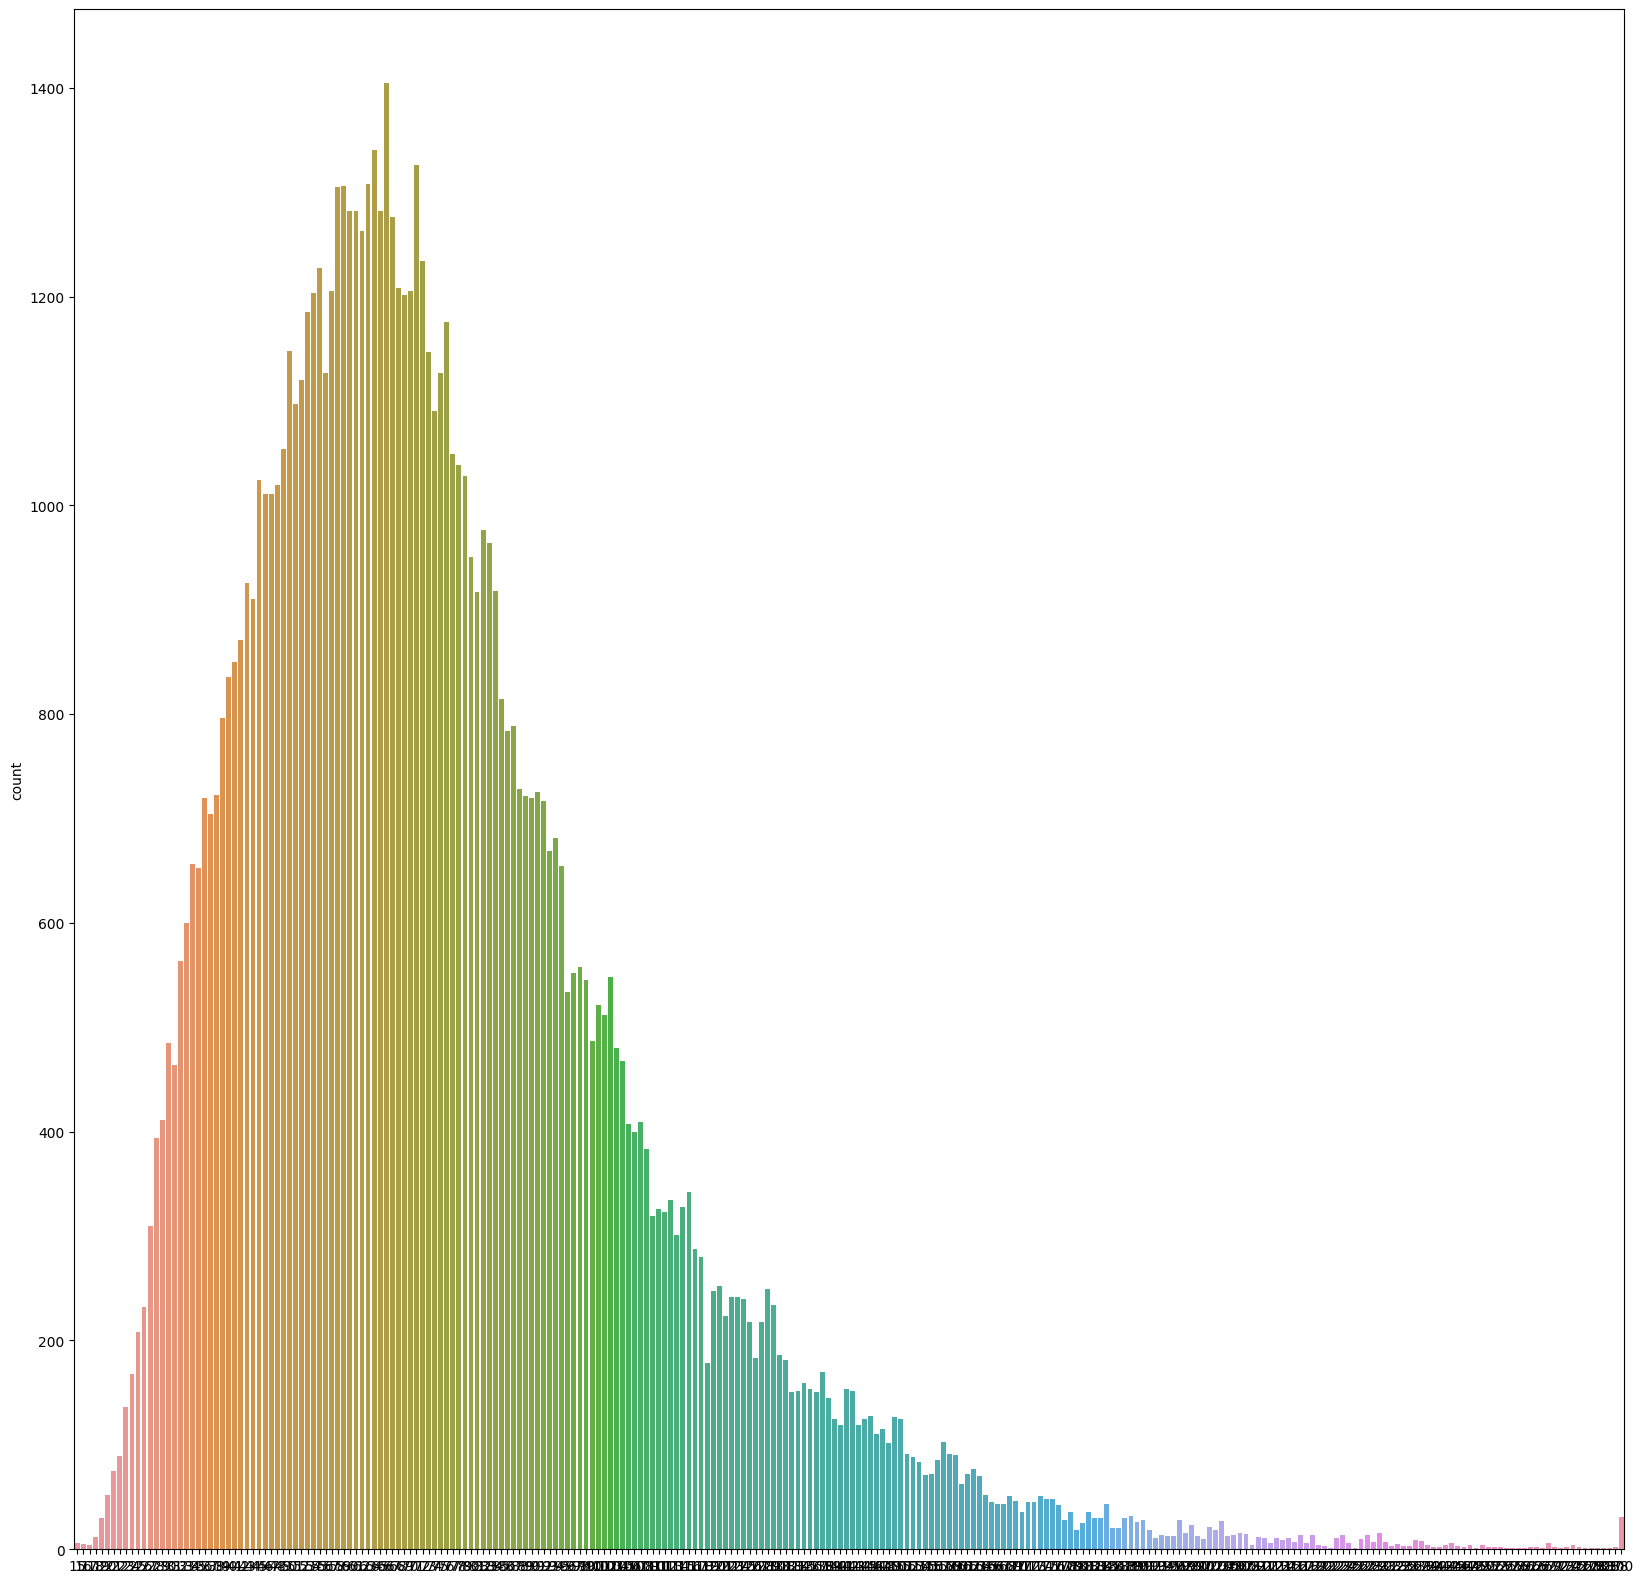

In [9]:
builder = SkeletonFileBuilder(file_names=set(file_list))
file_iterator = iter(builder)

In [10]:
with ThreadPoolExecutor() as executor:
    num_frame_mask = list(tqdm(executor.map(get_num_frame_mask, file_iterator), total=len(file_iterator)))

100%|██████████| 84925/84925 [25:15<00:00, 56.04it/s]  


In [11]:
num_frame_mask = np.array(num_frame_mask)

In [12]:
num_frame_mask.sum()

54992

In [14]:
file_list = np.array(file_list)
file_list.shape,num_frame_mask.shape

((84925,), (84925,))

In [15]:
file_list_above_60 = file_list[num_frame_mask]

In [16]:
file_list_above_60.shape

(54992,)

In [17]:
#np.savez("E:\\FYP_Data\\NTU120\\file_list_above_60.npz",files = file_list_above_60)

In [5]:
NUMPY_FILE_LOCATION = "E:\\FYP_Data\\NTU120\\skel\\nturgbd_skeletons_s001_to_s032\\npz_files"

numpy_files = [os.path.join(NUMPY_FILE_LOCATION,x) for x in os.listdir(NUMPY_FILE_LOCATION)]

In [6]:
file_iter = FileListIterator(numpy_files)
file_iterator = iter(file_iter)

In [7]:
with ThreadPoolExecutor() as executor:
    joint_count = list(tqdm(executor.map(file_num_joints, file_iterator), total=len(file_iterator)))

100%|██████████| 84924/84924 [23:18<00:00, 60.71it/s]  


In [8]:
np.unique(joint_count,return_counts=True)

(array([-2.773103, -2.757613, -2.747778, ...,  5.066534,  5.194271,
         5.207055]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))